# BLOB Classification


In [92]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

blob_images = np.load('Downloads/blobs.npy')
blob_labels = np.load('Downloads/labels.npy')
blob_images.shape

(64, 64, 6000)

In [4]:
import tensorflow as tf
import math
import matplotlib.pyplot as plt
import numpy as np
import os

In [5]:
config={
    "batch_size":32,
    "epochs":50,
    "optimizer":"adam",
    "nmaps":8
}

In [6]:
# Load Dataset
gen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.,validation_split=0.1)
train=gen.flow_from_directory('D:/RESEARCH/POST_PHD/UPC/000_DMD_DL/Blob Interpret/blobs_new',target_size=(128,128),batch_size=config['batch_size'],subset='training',color_mode = 'grayscale')
val=gen.flow_from_directory('D:/RESEARCH/POST_PHD/UPC/000_DMD_DL/Blob Interpret/blobs_new',target_size=(128,128),batch_size=config['batch_size'],subset='validation',color_mode = 'grayscale')
#test=gen.flow_from_directory('D:/RESEARCH/POST_PHD/UPC/000_DMD_DL/Blob Interpret/test',target_size=(128,128),batch_size=config['batch_size'],subset='test',color_mode = 'grayscale')

Found 8820 images belonging to 2 classes.
Found 980 images belonging to 2 classes.


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
#Build the model
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu',input_shape=[128,128,1]),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(2,activation='softmax')
])
# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# print the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0

In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D,BatchNormalization
#Build the model
from tensorflow.keras import layers
num_classes=2
def mo():
    inp = tf.keras.Input((128,128,1))
    c1 =layers.Conv2D(32, kernel_size=3, activation="relu")(inp)
    bn1 = layers.BatchNormalization()(c1)
    mp1 = layers.MaxPooling2D(pool_size=(2, 2))(bn1)
    c2 =layers.Conv2D(64, kernel_size=3, activation="relu")(mp1)
    bn2 = layers.BatchNormalization()(c2)
    mp2 = layers.MaxPooling2D(pool_size=(2, 2))(bn2)
    flat = layers.Flatten(name="features")(mp2)
    drop=layers.Dropout(0.5)(flat)
    dense = layers.Dense(num_classes, activation="softmax")(drop)
    return tf.keras.models.Model(inputs=[inp],outputs=[dense])
# Compile the model
model=mo()
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# print the model architecture
model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 1)]     0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 126, 126, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 64)       

In [94]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [95]:
history=model.fit(train,
    validation_data=val,
    steps_per_epoch=100,
    epochs=5)

Epoch 1/5
100/100 [==============================] - 53s 529ms/step - loss: 0.7134 - accuracy: 0.9103 - val_loss: 4.8207 - val_accuracy: 0.5000
Epoch 2/5
100/100 [==============================] - 53s 528ms/step - loss: 0.0997 - accuracy: 0.9865 - val_loss: 0.1667 - val_accuracy: 0.9480
Epoch 3/5
100/100 [==============================] - 54s 537ms/step - loss: 0.1621 - accuracy: 0.9791 - val_loss: 1.0941 - val_accuracy: 0.8337
Epoch 4/5
100/100 [==============================] - 54s 538ms/step - loss: 0.0977 - accuracy: 0.9878 - val_loss: 0.0171 - val_accuracy: 0.9959
Epoch 5/5
100/100 [==============================] - 54s 541ms/step - loss: 0.2430 - accuracy: 0.9758 - val_loss: 1.5247 - val_accuracy: 0.8531


(128, 128)


(1, 128, 128, 1)

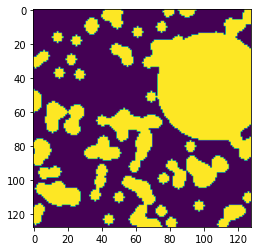

In [124]:
from tensorflow.keras.preprocessing.image import load_img
test_img = load_img('D:/RESEARCH/POST_PHD/UPC/000_DMD_DL/Blob Interpret/test/1/4901.png', target_size=(128, 128),color_mode='grayscale')
plt.imshow(test_img)
#test_img.size
print(np.array(test_img).shape)
t=(np.expand_dims(np.expand_dims(np.array(sample_img),axis=-1),axis=0))
t.shape

In [126]:
pr=model.predict(t)
np.argmax(pr)
pr

array([[0., 1.]], dtype=float32)

# Soft attention Feature Maps

In [99]:
def build_featuremap_model(model):
    conv_layer_outputs = [layer.output for layer in model.layers if isinstance(layer, tf.keras.layers.Conv2D)]
    new_model = tf.keras.models.Model(inputs = model.inputs, outputs=conv_layer_outputs)
    new_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return new_model

In [100]:
new_global_model = build_featuremap_model(model)

In [114]:
from tensorflow.keras.preprocessing.image import load_img
sample_img = load_img('D:/RESEARCH/POST_PHD/UPC/000_DMD_DL/Blob Interpret/test/1/4901.png', target_size=(128, 128),color_mode='grayscale')

In [115]:
(np.expand_dims(sample_img, axis=-1))
print(np.array(sample_img).shape)


(128, 128)


In [116]:
outs = new_global_model(np.expand_dims(np.expand_dims(np.array(sample_img),axis=-1),axis=0))

In [117]:
conv_outs = outs

In [118]:
def get_feature_maps_from_outs(outs):# layers x imgs x h x w x filters
    num_layers = len(outs)
    num_imgs = outs[0].shape[0]
    img_outs = [[[] for _ in range(num_layers)] for _ in range(num_imgs)]
    for i in range(num_layers):
        for j in range(num_imgs):
            img_out = outs[i][j]
            for k in range(img_out.shape[-1]):
                img_outs[j][i].append(img_out[:, :, k])
                
    return img_outs # imgs x layers x filters x h x w

In [119]:
img_outs = get_feature_maps_from_outs(conv_outs)

In [120]:
def softmax_image(image):
    orig_shape = image.shape
    return tf.reshape(tf.math.softmax(tf.reshape(image, [-1])), orig_shape)

In [121]:
@tf.function
def normalize(heatmap):
    num = heatmap - tf.reduce_min(heatmap)
    deno = (tf.reduce_max(heatmap) - tf.reduce_min(heatmap))
    if deno == 0:
        return heatmap
    heatmap = num / deno
    return heatmap

In [122]:
soft_img_outs = [[[softmax_image(filter_out) for filter_out in layer_out] for layer_out in img_out] for img_out in img_outs]

In [123]:
layer_names = [layer.name for layer in model.layers if isinstance(layer, tf.keras.layers.Conv2D)]
layer_names

['conv2d_5', 'conv2d_6']

C:\Users\sikha\anaconda3\envs\gpu2\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


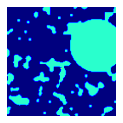

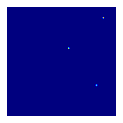

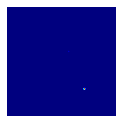

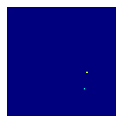

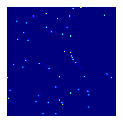

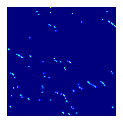

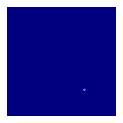

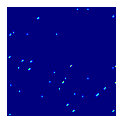

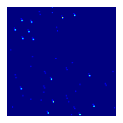

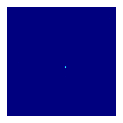

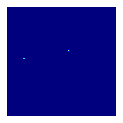

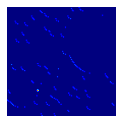

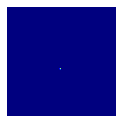

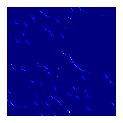

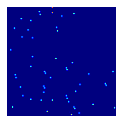

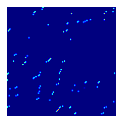

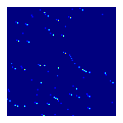

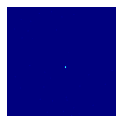

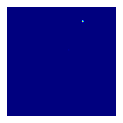

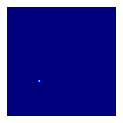

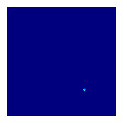

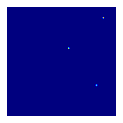

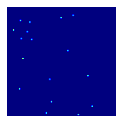

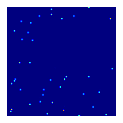

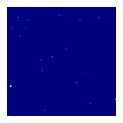

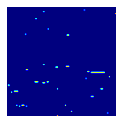

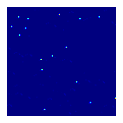

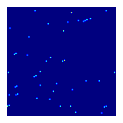

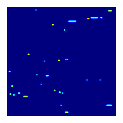

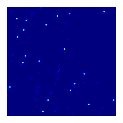

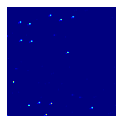

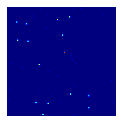

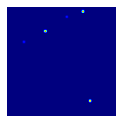

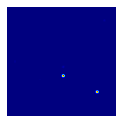

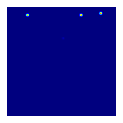

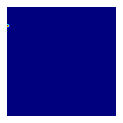

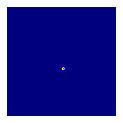

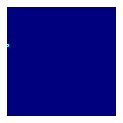

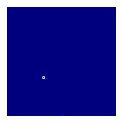

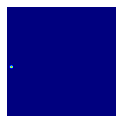

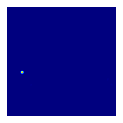

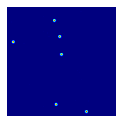

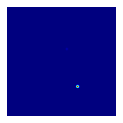

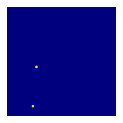

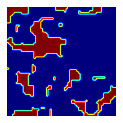

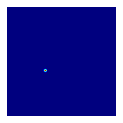

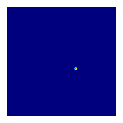

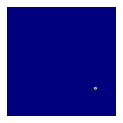

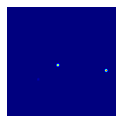

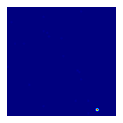

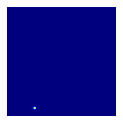

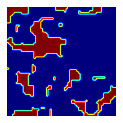

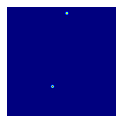

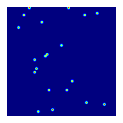

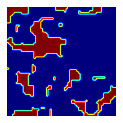

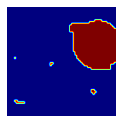

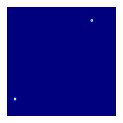

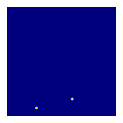

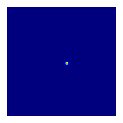

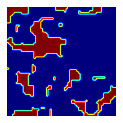

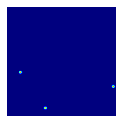

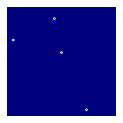

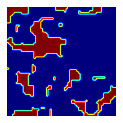

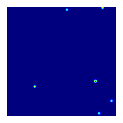

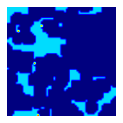

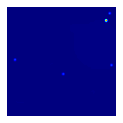

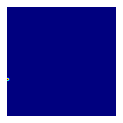

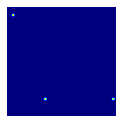

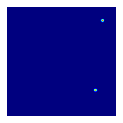

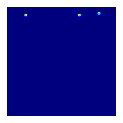

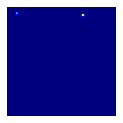

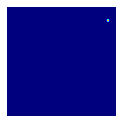

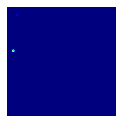

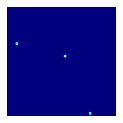

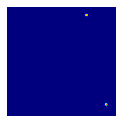

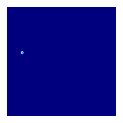

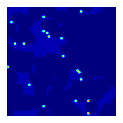

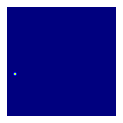

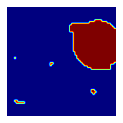

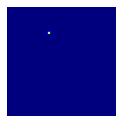

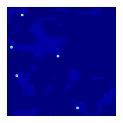

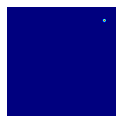

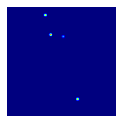

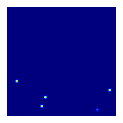

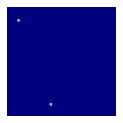

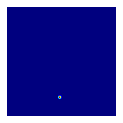

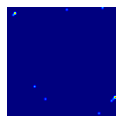

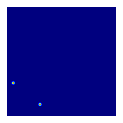

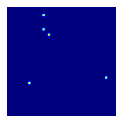

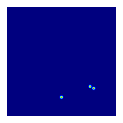

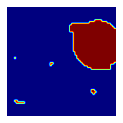

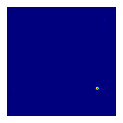

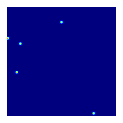

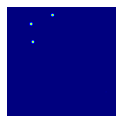

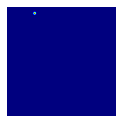

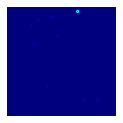

In [127]:
for img_id, img_out in enumerate(soft_img_outs):
    !mkdir "Blob_maps/soft_attention_maps_output_model2_class1_correct/$img_id/"
    for layer_id, layer_out in enumerate(img_out):
        for filter_id, filter_out in enumerate(layer_out):
            img = filter_out
            img = tf.image.resize(img[tf.newaxis, ..., tf.newaxis], [128, 128])
            img = tf.squeeze(img)
            plt.figure(figsize=(2,2))
            plt.imshow( img, cmap="jet")
            plt.axis('off')
            plt.savefig(f"Blob_maps/soft_attention_maps_output_model2_class1_correct/{img_id}/layer-{layer_id}-{layer_names[layer_id]}-{filter_id}.jpg",bbox_inches='tight', pad_inches=0)
            #plt.imsave(f"maps/softmax_output/{img_id}/layer-{layer_id}-{layer_names[layer_id]}-{filter_id}.jpg", img)

C:\Users\sikha\anaconda3\envs\gpu2\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


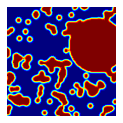

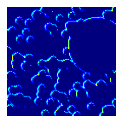

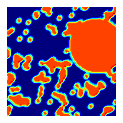

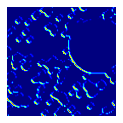

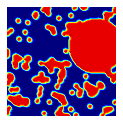

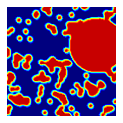

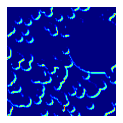

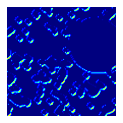

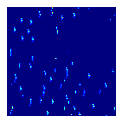

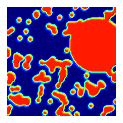

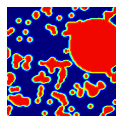

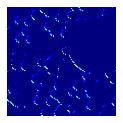

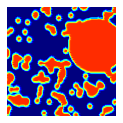

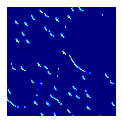

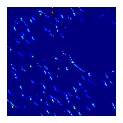

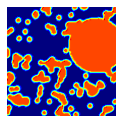

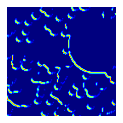

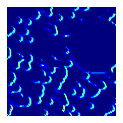

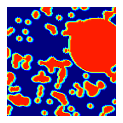

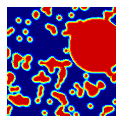

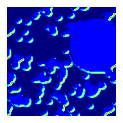

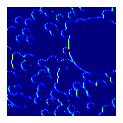

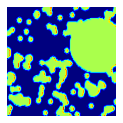

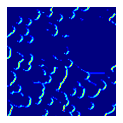

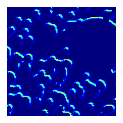

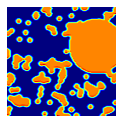

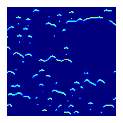

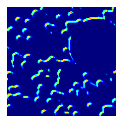

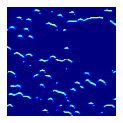

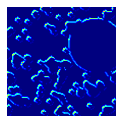

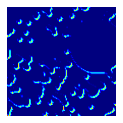

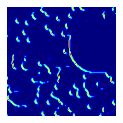

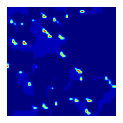

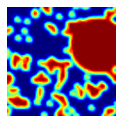

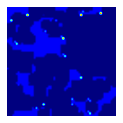

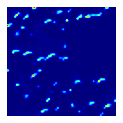

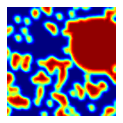

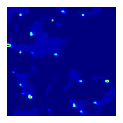

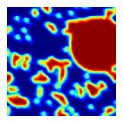

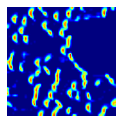

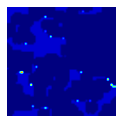

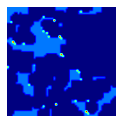

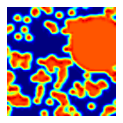

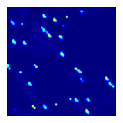

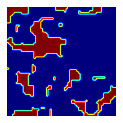

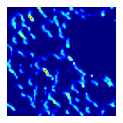

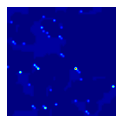

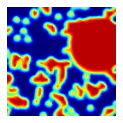

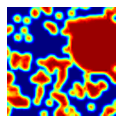

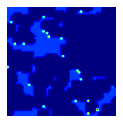

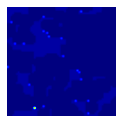

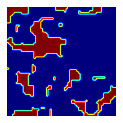

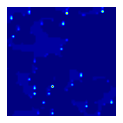

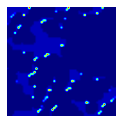

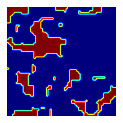

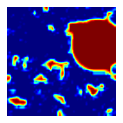

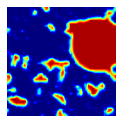

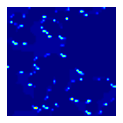

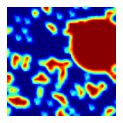

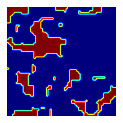

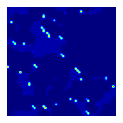

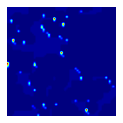

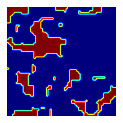

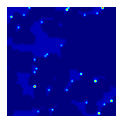

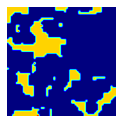

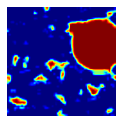

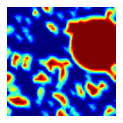

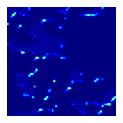

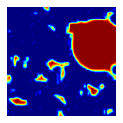

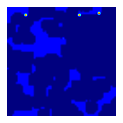

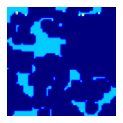

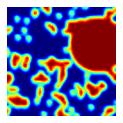

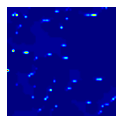

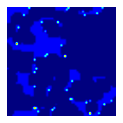

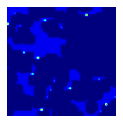

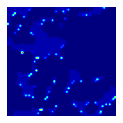

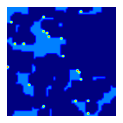

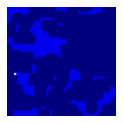

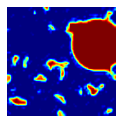

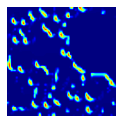

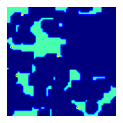

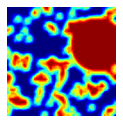

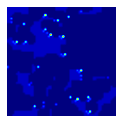

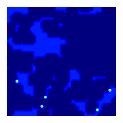

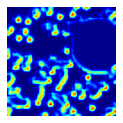

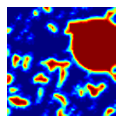

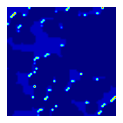

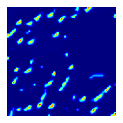

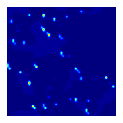

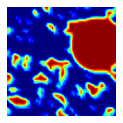

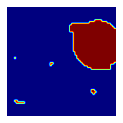

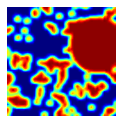

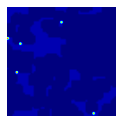

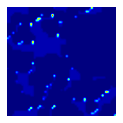

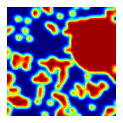

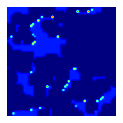

In [128]:
for img_id, img_out in enumerate(img_outs):
    !mkdir "Blob_maps/feature_output_model2_class1_correct/$img_id/"
    for layer_id, layer_out in enumerate(img_out):
        for filter_id, filter_out in enumerate(layer_out):
            img = filter_out
            img = tf.image.resize(img[tf.newaxis, ..., tf.newaxis], [128, 128])
            img = tf.squeeze(img)
            plt.figure(figsize=(2,2))
            plt.imshow( img, cmap="jet")
            plt.axis('off')
            plt.savefig(f"Blob_maps/feature_output_model2_class1_correct/{img_id}/layer-{layer_id}-{layer_names[layer_id]}-{filter_id}.jpg",bbox_inches='tight', pad_inches=0)
            #plt.imsave(f"maps/softmax_output/{img_id}/layer-{layer_id}-{layer_names[layer_id]}-{filter_id}.jpg", img)

In [ ]:
def get_feature_maps_from_outs(outs):# layers x imgs x h x w x filters
    num_layers = len(outs)
    num_imgs = outs[0].shape[0]
    img_outs = [[[] for _ in range(num_layers)] for _ in range(num_imgs)]
    for i in range(num_layers):
        for j in range(num_imgs):
            img_out = outs[i][j]
            for k in range(img_out.shape[-1]):
                img_outs[j][i].append(img_out[:, :, k])
                
    return img_outs # imgs x layers x filters x h x w

In [ ]:
img_outs = get_feature_maps_from_outs(conv_outs)

In [ ]:
def softmax_image(image):
    orig_shape = image.shape
    return tf.reshape(tf.math.softmax(tf.reshape(image, [-1])), orig_shape)

In [ ]:
@tf.function
def normalize(heatmap):
    num = heatmap - tf.reduce_min(heatmap)
    deno = (tf.reduce_max(heatmap) - tf.reduce_min(heatmap))
    if deno == 0:
        return heatmap
    heatmap = num / deno
    return heatmap

In [ ]:
soft_img_outs = [[[softmax_image(filter_out) for filter_out in layer_out] for layer_out in img_out] for img_out in img_outs]

In [ ]:
layer_names = [layer.name for layer in model.layers if isinstance(layer, tf.keras.layers.Conv2D)]
layer_names

In [ ]:
for img_id, img_out in enumerate(soft_img_outs):
    !mkdir "maps_blob/softmax_output/$img_id/"
    for layer_id, layer_out in enumerate(img_out):
        for filter_id, filter_out in enumerate(layer_out):
            img = filter_out
            img = tf.image.resize(img[tf.newaxis, ..., tf.newaxis], [128, 128])
            img = tf.squeeze(img)
            plt.figure(figsize=(2,2))
            plt.imshow( img, cmap="jet")
            plt.axis('off')
            plt.savefig(f"maps/softmax_output/{img_id}/layer-{layer_id}-{layer_names[layer_id]}-{filter_id}.jpg",bbox_inches='tight', pad_inches=0)
            #plt.imsave(f"maps/softmax_output/{img_id}/layer-{layer_id}-{layer_names[layer_id]}-{filter_id}.jpg", img)

In [11]:
import numpy as np
#from scipy.misc import toimage,imsave
from keras.preprocessing.image import save_img
import os


# in_dir = "imgs_train"
in_dir = "imgs_test"
# in_dir = "imgs_mask_test"
# in_dir = "imgs_mask_train"

images_to_convert_path = 'Downloads/blobs' + in_dir + '.npy'

img_array = np.load(images_to_convert_path)

output_dir = 'Downloads/blobs_converted'

# these are the selected 'random' 5 images to test
# names will be matched by index for now: 1=22, 2=234...
list_of_random_index = [1, 354, 453, 599, 844]

#  output directory
def ensure_directory_exist(directory_name):
    exist_bool = os.path.isdir('./' + directory_name)
    if not exist_bool:
        os.mkdir(directory_name)

# use this to show the image rather than save it, if you want
def show_image(image):
    toimage(image).show()

# save the image array to a .png file
def plot_image_save_to_file(name, img_cur):
    #  ensure a directory is present/build if necessary
    save_directory = output_dir  # from global value
    ensure_directory_exist(save_directory)

    #  build full path and save
    file_name = name + '.png'
    full_path = os.path.join(save_directory, file_name)
    imsave(full_path, img_cur)

# convert the numpy array to a int array through .astype('float32')
def convert_numpy_array_to_int_array(img_array):
    print(len(img_array))   # will return number of pictures
    image_list = []
    i = 0
    while i < len(img_array):
        for photo_indiv in img_array[i]:
            image = photo_indiv.astype('float32')
            image_list.append(image)
            # plot_image_save_to_file("jack", image)
            # print(image)
        i += 1
    return image_list

# loop through converted int array and save the image to .png
def convert_int_array_to_png(image_list):
    ind_id = 1
    for photo_array in image_list:
        name = in_dir + '_' + str(ind_id)
        plot_image_save_to_file(name, photo_array)
        ind_id += 1

# create a list of 5 int image array
def get_random_5(img_array_int):
    mySet = set()
    smaller_list = []

    for selected_index in list_of_random_index:
        mySet.add(selected_index)

    i = 0
    while i < len(img_array_int):
        if i in mySet:
            smaller_list.append(img_array_int[i])
        i += 1

    return smaller_list

# wrapper to create 5 'random'(spec. gloablly) .png files to view binary mask
def convert_random_5(img_array_int):
    smaller_list = get_random_5(img_array_int)
    convert_int_array_to_png(smaller_list)

# main wrapper
def main():
    img_array_int = convert_numpy_array_to_int_array(img_array)
    convert_random_5(img_array_int)  # TODO: make sure naming matches
    # convert_all_images(img_array_int) # DONT RUN THIS
main()

ImportError: cannot import name 'get_config'

In [8]:
pip install scipy==1.2.0

  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\sikha\\anaconda3\\envs\\gpu2\\lib\\site-packages\\~cipy\\fft\\_pocketfft\\pypocketfft.cp36-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

